## Predict Airlines Delay


OVERVIEW:
Manaswini Maddu
Jupyter Notebook in Visual Studio Code
Installed python 3, jupyter notebook in Visual studio code
Installed the libraries that are required using pip install command 
1. pip install pandas
2. pip install numpy
3. pip install sklearn
Implemented my code by first preprocessing the data then visualizing the data and then created models using logistic regression algorithm and decision tree algorithm in classification methods.
Then saved my file and then clicked on run all option.

Importing pandas library for data manipulation and data analysis,
numpy library for mathematical problems (large multi-dimensional array and matrix processing), 
sklearn library is the most useful and robust library for machine learning in Python. It provides efficient tools for machine learning and statistical modeling including classification, regression etc.
train_test_split library from sklearn model to split the data into training and testing sets for solving classification problems and 
importing all other libraries fro sklearn that are required.

In [1]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay

from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

read_csv in pandas import the csv file or input file that we want to read into data frame format and column id in my data set is taken as index column. Here row is generally a record whereas columns are the features/label/variables

In [2]:
data=pd.read_csv("Airlines.csv",index_col='id')
data

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
id,,,,,,,,
1,CO,269,SFO,IAH,3,15,205,1
2,US,1558,PHX,CLT,3,15,222,1
3,AA,2400,LAX,DFW,3,20,165,1
4,AA,2466,SFO,DFW,3,20,195,1
5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...
539379,CO,178,OGG,SNA,5,1439,326,0
539380,FL,398,SEA,ATL,5,1439,305,0
539381,FL,609,SFO,MKE,5,1439,255,0


head() function in python is utilized to get the first 5 records(rows) in dataset simillary tail() function is used to get the last 5 records in data set

In [3]:
data.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
id,,,,,,,,
1,CO,269,SFO,IAH,3,15,205,1
2,US,1558,PHX,CLT,3,15,222,1
3,AA,2400,LAX,DFW,3,20,165,1
4,AA,2466,SFO,DFW,3,20,195,1
5,AS,108,ANC,SEA,3,30,202,0


shape in python numpy library returns number of records and features (dimensions) in data set

In [4]:
data.shape

(539383, 8)

Data Preprocessing: In this technique we change our raw data into information. Since not all the given records and features are useful for our analysis and storing that unrequited data consumes lot of space and time during our analysis which makes inefficient. Therefore in this stage we filter out the raw data and clean the data and making it feasible for analysis

In [5]:
##Removing the blank rows on the predicted label if any 
data.dropna(axis=0,subset=['Delay'],inplace=True)


Here for analysis dividing the data set to train data (80%) and test data (20%) and we can observe that among the total records 80% that is 431506 records are under train data and remaining are considered as test data

In [6]:
y = data.Delay
X = data.drop('Delay',axis = 1)
X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size = 0.8,test_size = 0.2)
X_train.shape

(431506, 7)

Removing the Null values in dataset in all the features to increase efficiency

In [7]:
## Finding if  there are any null values in the Dataset
data.isnull().sum()
## From this we can say that there are no null values in data set that is considered

Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In the step, processing the data based on categorical values. This is the type where the data can be divide into groups. For example in Airline feature there are different types of airlines so the same type of airlines can be grouped and represented. Here there are 18 unique airlines in data set and there are 293 locations (airport from and to).

In [8]:
## Dealing with the categorical values
categ_col=[col for col in X_train.columns if X[col].dtype=='object']
for col in categ_col:
    print(col,":",len(X_train[col].unique()))

Airline : 18
AirportFrom : 293
AirportTo : 293


##Visualization



This bar graph represents the delay count of each unique airline. By this we can know which airline got delayed more times and the airline is WN that delayed most. replace function in python is used to replace the old with new. Here groupby is used to group all the unique airlines together to get their count and unstack is used so that features can be represented as rows for data frame representation

<AxesSubplot:xlabel='Airline'>

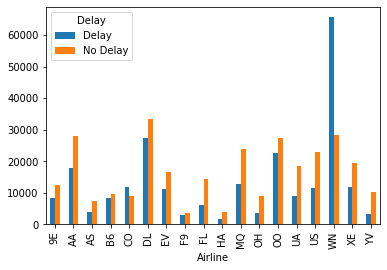

In [9]:
Airlines_delay=data.replace({'Delay':{0:'No Delay',1:'Delay'}})
Airlines_delay.groupby(by = ['Airline', 'Delay']).Delay.count().unstack().plot.bar()

In this below graph, airlines delay in sorted way is represented. That is the number of times that the airline is being delayed is calculated and sorted and plotted in graph. Therefore the analysis can be quite easy and we observe that the WN airline is most delayed. Here groupby is used to group all the unique airlines together to get their count of delays. The mean function is used to find the mean/average to represent in percentages.

<AxesSubplot:ylabel='Airline'>

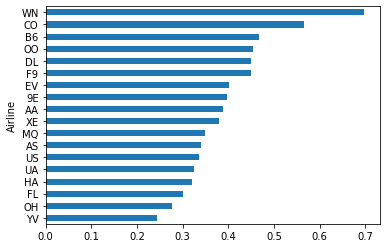

In [10]:
# % Delayed flights of each Airline
data.groupby(by = 'Airline').Delay.mean().sort_values().plot.barh()

The below visualization is between airline and the days of week. For each airline and for every day in the week how the airline got delayed is represented in bar graph. Through this it can be observed that on which day of the week the particular airline is getting delayed more. Here groupby is used to group all the unique airlines together and unstack is used so that features can be represented as records in data frame. The mean in python is used to find the average of the numbers list and figsize is for figure width and height and its function is figsize(width, height)

array([<AxesSubplot:title={'center':'9E'}, ylabel='DayOfWeek'>,
       <AxesSubplot:title={'center':'AA'}, ylabel='DayOfWeek'>,
       <AxesSubplot:title={'center':'AS'}, ylabel='DayOfWeek'>,
       <AxesSubplot:title={'center':'B6'}, ylabel='DayOfWeek'>,
       <AxesSubplot:title={'center':'CO'}, ylabel='DayOfWeek'>,
       <AxesSubplot:title={'center':'DL'}, ylabel='DayOfWeek'>,
       <AxesSubplot:title={'center':'EV'}, ylabel='DayOfWeek'>,
       <AxesSubplot:title={'center':'F9'}, ylabel='DayOfWeek'>,
       <AxesSubplot:title={'center':'FL'}, ylabel='DayOfWeek'>,
       <AxesSubplot:title={'center':'HA'}, ylabel='DayOfWeek'>,
       <AxesSubplot:title={'center':'MQ'}, ylabel='DayOfWeek'>,
       <AxesSubplot:title={'center':'OH'}, ylabel='DayOfWeek'>,
       <AxesSubplot:title={'center':'OO'}, ylabel='DayOfWeek'>,
       <AxesSubplot:title={'center':'UA'}, ylabel='DayOfWeek'>,
       <AxesSubplot:title={'center':'US'}, ylabel='DayOfWeek'>,
       <AxesSubplot:title={'center':'WN'

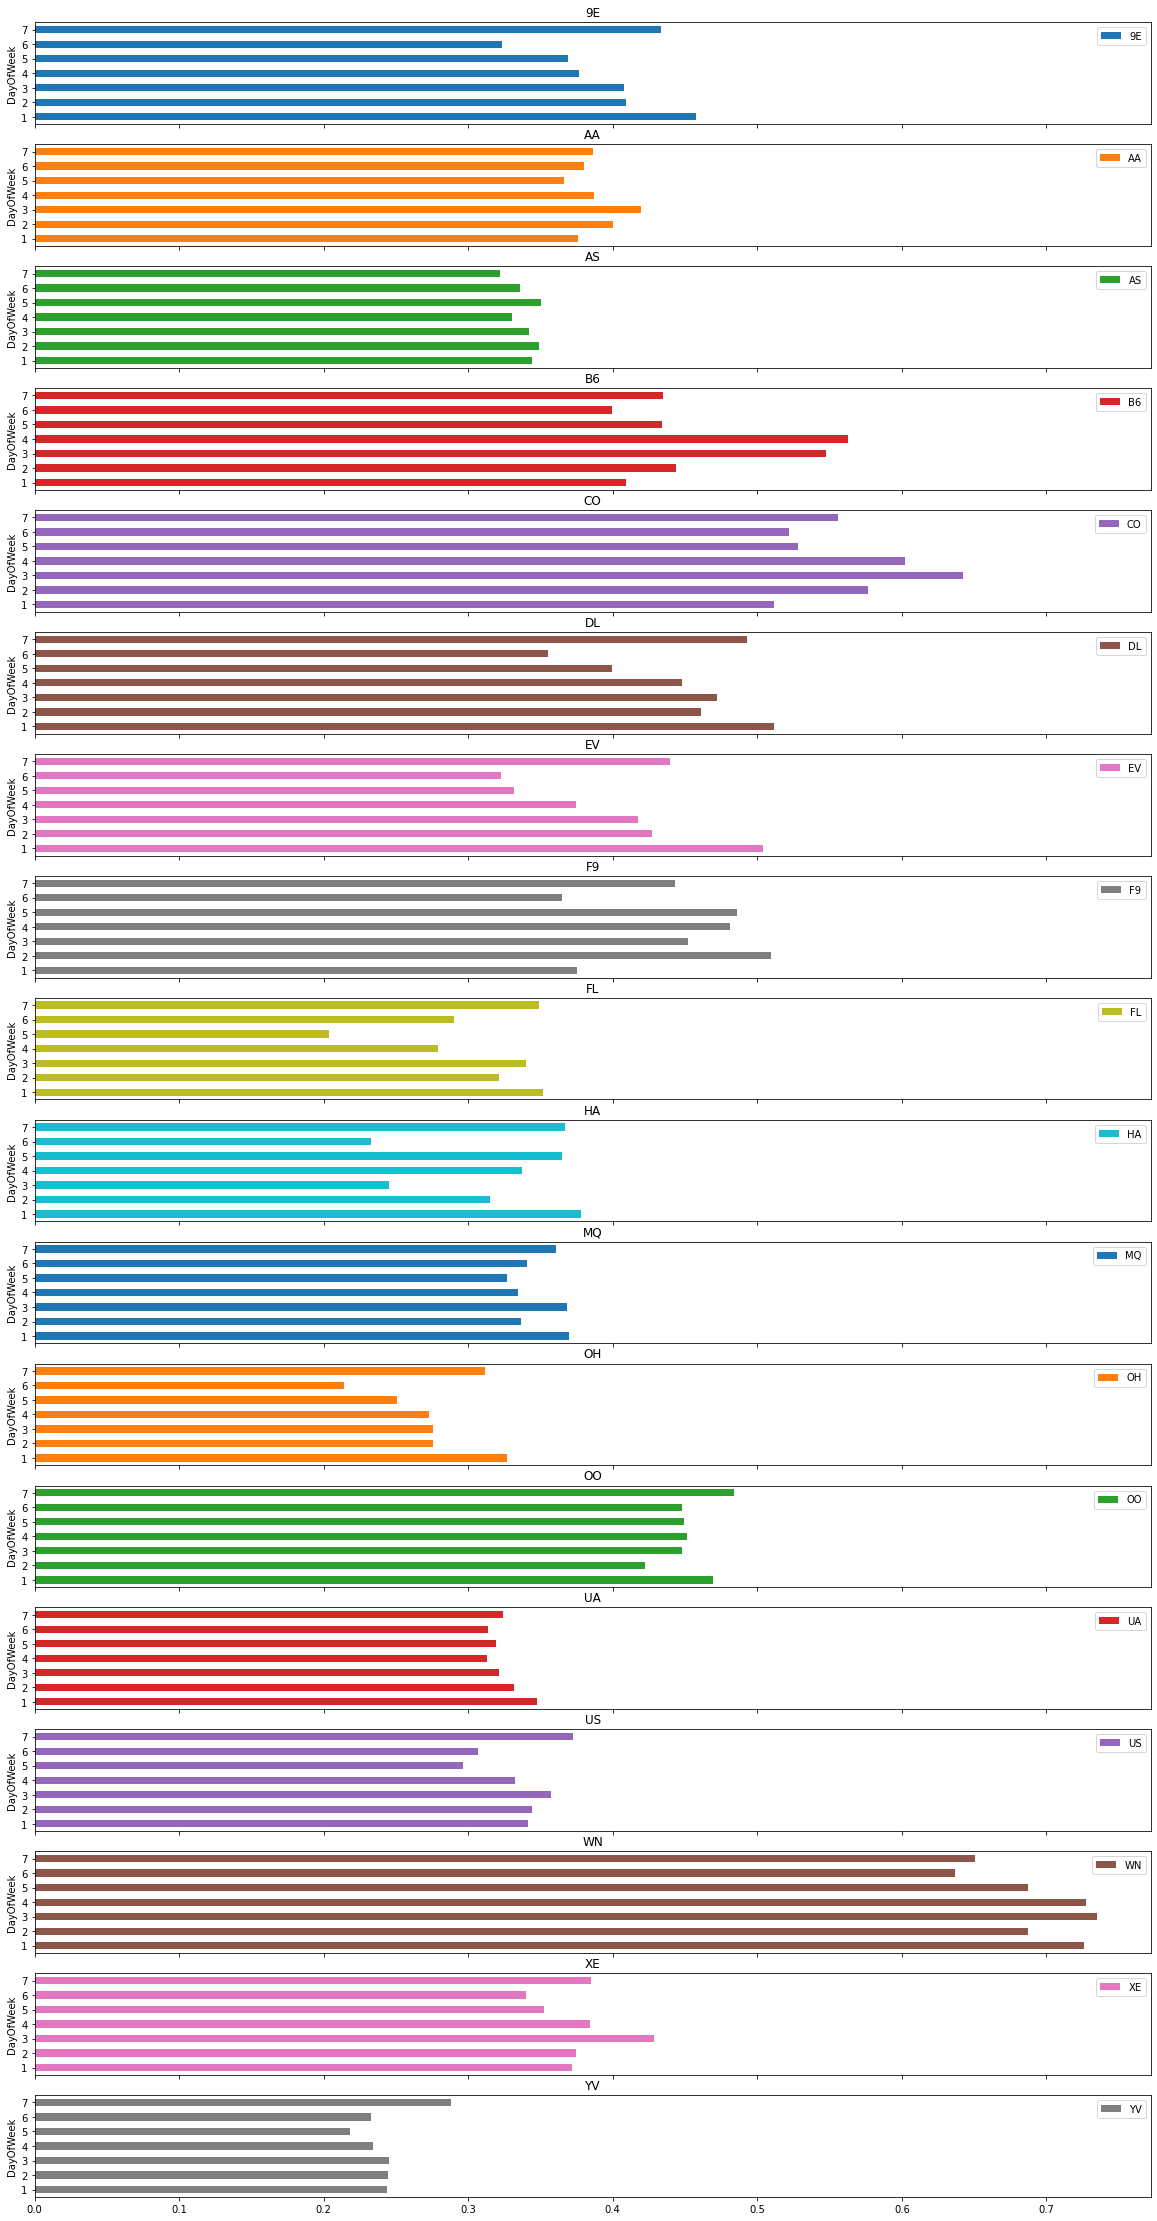

In [11]:
data.groupby(by = ['DayOfWeek', 'Airline']).Delay.mean().sort_index().unstack().plot.barh(subplots=True, figsize=(20,40))

Here splitting the data into the delay data and no delay data. In y the delay data is stored. In X variable the delay data is dropped such that no delay data is only present. Then again the data is splitted to train and test data. The order of the data is reorganized using shuffle function.

In [12]:
y = data["Delay"]
X = data.drop("Delay", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle = True)

Logistic Regression Model with Linear Discriminant Analysis: 
Define Data set:
make_classification creates a random classification model by taking 1000 samples and 20 features. The number of informative and redundant features are considered here as 10 and random linear combinations of informative features are the number of redundant features. The random number generation of data set creation is random_state feature.
Define pipeline:
This pipeline feature allows various functions to string together so that it helps in automating workflow. In this case data is preprocessed using linear discriminant analysis and then the output is pipeline to logistic regression model. n_components is taken as n-1 classes and here we have only 2 components and this n_components is given as 1. Thus model is created.
Evaluate Model: 
Repeated Stratified KFold model is used for cross validating the model. It improves the performance of model by repeating the cross-validation (taking random sets) procedure multiple times and calculating the mean and standard deviation result across all folds (from all runs).
The cross_val_score function is utilized to perform the evaluation. It takes the dataset and cross-validation configuration and returning scores list calculated for each fold.
Calculation of Performance:
Mean (accuracy) and Standard deviation are calculated to analyse the performance.

In [13]:
# evaluate lda with logistic regression algorithm for classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# define the pipeline
steps = [('lda', LinearDiscriminantAnalysis(n_components=1)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.825 (0.034)


Decision Tree Classifier Model: 
Preprocessing the Data:
get_dummies converts the categorical column(data) into dummy or indicator variables (0s and 1s) to utilize for data manipulation.
Criterion is just a string that follows the certain format.
The gini index (minimize the probability of misclassification) and entropy (measure of impurity) are used.
The max_depth function is the lenth from tree root to the leaf root. 
Grid Search CV is function that loops through pre defined hyper parameters and chooses the model that fits on training set.
Finally required data is taken as arguments using fit method.

In [14]:
#Model: Delay ~ Airline + DayOfWeek + Length
features_train = pd.get_dummies(X_train[['Airline', 'DayOfWeek', 'Length']], columns = ['Airline'])

param_1 = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,25,50,75,100,150]}
grid_1 = GridSearchCV(DecisionTreeClassifier(), param_1, cv = 5)
grid_1.fit(features_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 25, 50, 75, 100,
                                       150]})

Performance calculation in Decision Tree model using ROC curve:
The decision tree algorithm is applied the data that is taken in the previous step.
And the output is taken as argument using fit function.
Predict function is utilized to predict the labels of data values by analysis with trained model.
The performance is examined by ROC (receiver operating characteristic) graph. It is the graph plotted between false and true positive rate. The area under curve also gives the accuracy of the model. 
Precision refers to exactness or closeness wheras recall refers to the ratio of the number of true positives to the total number of true and false positives. It gives the ability of the classifier to find the positive samples. Here the f1-score gives the mean of precision and recall and it corresponds to the accuracy of classifier which is 63%. The support is the number of samples of the true response.
Macro average is the mean of scores of all classes. The weighted average is the average of total number of true positives to the total number of objects in all classes.

{'criterion': 'entropy', 'max_depth': 9}
              precision    recall  f1-score   support

           0       0.62      0.84      0.72     98882
           1       0.65      0.37      0.47     79115

    accuracy                           0.63    177997
   macro avg       0.64      0.60      0.59    177997
weighted avg       0.64      0.63      0.61    177997



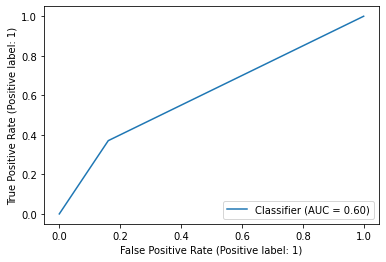

In [15]:
features_test = pd.get_dummies(X_test[['Airline', 'DayOfWeek', 'Length']], columns = ['Airline'])

print(grid_1.best_params_)
clf_1 = DecisionTreeClassifier(**grid_1.best_params_)
clf_1.fit(features_train, y_train)

pred_label = clf_1.predict(features_test)
print(classification_report(y_test,pred_label))

RocCurveDisplay.from_predictions(y_test, pred_label) 